# understanding information

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
path = '2019-Oct.csv'
df = pd.read_csv(path)
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,0.42,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,0.42,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,2.19,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,0.42,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.09,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102052 entries, 0 to 4102051
Data columns (total 9 columns):
event_time       object
event_type       object
product_id       int64
category_id      int64
category_code    object
brand            object
price            float64
user_id          int64
user_session     object
dtypes: float64(1), int64(3), object(5)
memory usage: 281.7+ MB


In [3]:
df.brand.value_counts()

runail       306239
irisk        226589
masura       195170
grattol      132130
bpw.style    114192
              ...  
gena              2
dessata           2
ikoo              1
pueen             1
shifei            1
Name: brand, Length: 240, dtype: int64

In [4]:
df.event_type.value_counts()

view                1861933
cart                1232385
remove_from_cart     762110
purchase             245624
Name: event_type, dtype: int64

In [5]:
df.user_id.nunique()

399615

In [6]:
df.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4042523
brand            1659030
price                  0
user_id                0
user_session         637
dtype: int64

category_code, brand列有大量缺失数值，后续对产品类目进行分析时要处理

## transfer event_time to datetime

In [7]:
import re
#split date and time
df['time_zoneless'] = df.event_time.str[:-3]
df['date'] = df.time_zoneless.map(lambda x: re.compile(' ').split(x)[0])
df['time'] = df.time_zoneless.map(lambda x: re.compile(' ').split(x)[1])
df.time_zoneless = pd.to_datetime(df['time_zoneless'])
df.date = pd.to_datetime(df['date'])

In [8]:
df['hour'] = df.time_zoneless.dt.hour
df['minute'] = df.time_zoneless.dt.minute
df['second'] = df.time_zoneless.dt.second
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,time_zoneless,date,time,hour,minute,second
0,2019-10-01 00:00:00 UTC,cart,5773203,1487580005134238553,NaN,runail,0.42,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 00:00:00,2019-10-01,00:00:00,0,0,0
1,2019-10-01 00:00:03 UTC,cart,5773353,1487580005134238553,NaN,runail,0.42,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 00:00:03,2019-10-01,00:00:03,0,0,3
2,2019-10-01 00:00:07 UTC,cart,5881589,2151191071051219817,NaN,lovely,2.19,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:07,2019-10-01,00:00:07,0,0,7
3,2019-10-01 00:00:07 UTC,cart,5723490,1487580005134238553,NaN,runail,0.42,463240011,26dd6e6e-4dac-4778-8d2c-92e149dab885,2019-10-01 00:00:07,2019-10-01,00:00:07,0,0,7
4,2019-10-01 00:00:15 UTC,cart,5881449,1487580013522845895,NaN,lovely,0.09,429681830,49e8d843-adf3-428b-a2c3-fe8bc6a307c9,2019-10-01 00:00:15,2019-10-01,00:00:15,0,0,15


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4102052 entries, 0 to 4102051
Data columns (total 15 columns):
event_time       object
event_type       object
product_id       int64
category_id      int64
category_code    object
brand            object
price            float64
user_id          int64
user_session     object
time_zoneless    datetime64[ns]
date             datetime64[ns]
time             object
hour             int64
minute           int64
second           int64
dtypes: datetime64[ns](2), float64(1), int64(6), object(6)
memory usage: 469.4+ MB


## if a single customer have same event to same product

In [10]:
cutomer_event_multiple_times = df.groupby(['user_id','product_id']).event_type.value_counts()

In [11]:
cutomer_event_multiple_times.unstack().head()

event_type          cart  purchase  remove_from_cart  view
user_id product_id                                        
4103071 5563536      NaN       NaN               NaN   1.0
        5670334      NaN       NaN               NaN   1.0
        5735272      NaN       NaN               NaN   1.0
        5784982      NaN       NaN               NaN   2.0
        5795273      NaN       NaN               NaN   1.0

# customer behavior analysis
## PV and UV
### daily
Use group by to calculate the page view and unique visitor in each day:

In [12]:
pv_d = df.groupby('date').user_id.count().reset_index()
pv_d.rename(columns = {'user_id':'pv'}, inplace = True)
uv_d = df.groupby('date').user_id.nunique().reset_index()
uv_d.rename(columns = {'user_id':'uv'}, inplace = True)
pv_d.head()

,date,pv
0,2019-10-01,142414
1,2019-10-02,201068
2,2019-10-03,124847
3,2019-10-04,115610
4,2019-10-05,106342


In [13]:
pv_d.describe()

,pv
count,31.000000
mean,132324.258065
std,22344.687255
min,104292.000000
25%,117907.000000
50%,130023.000000
75%,136202.000000
max,201068.000000


In [14]:
uv_d.describe()

,uv
count,31.000000
mean,17950.741935
std,4490.955600
min,14532.000000
25%,15672.000000
50%,16942.000000
75%,17432.000000
max,33859.000000


To draw on the x axis, add one column 'day' and store the day from the date to this column:

In [15]:
pv_d['day'] = pv_d.date.dt.strftime("%d")
pv_d.head()
uv_d['day'] = uv_d.date.dt.strftime('%d')

In [16]:
pv_d_max = pv_d[pv_d.pv == pv_d.pv.max()]
pv_d_max

,date,pv,day
1,2019-10-02,201068,02


In [17]:
uv_d_max = uv_d[uv_d.uv == uv_d.uv.max()]
uv_d_max 

,date,uv,day
1,2019-10-02,33859,02


Draw the line plot for daily PV and daily UV:

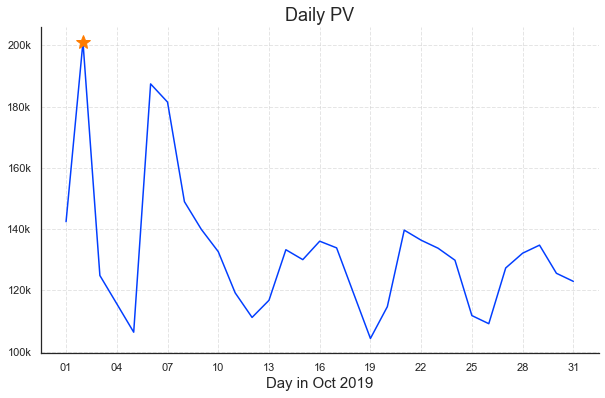

In [18]:
%matplotlib inline
xlabel = range(1,32,2)
fig = plt.figure(figsize = (10,6))
sns.set(style = 'white', palette = 'bright')
ax = fig.add_subplot()
plt.plot(pv_d.day, pv_d.pv)
plt.plot(pv_d_max.day, pv_d_max.pv, marker = '*', markersize = 15)
maxdate = pv_d_max.iloc[0,2]
maxpv_d = pv_d_max.iloc[0,1]
#plt.text(pv_d_max.day, pv_d_max.pv, 
#         "   {} times in {}/10".format(maxpv_d, maxdate))
plt.title('Daily PV', fontsize = 18)
plt.xlabel('Day in Oct 2019',fontsize = 15)
ax.set_yticks(range(100000,200001,20000))
ax.set_yticklabels(['100k','120k','140k','160k','180k','200k'])
ax.set_xticks(['01','04','07','10','13','16','19','22','25','28','31'])
plt.grid(linestyle = "--", alpha = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig('2.11 daily PV.png')

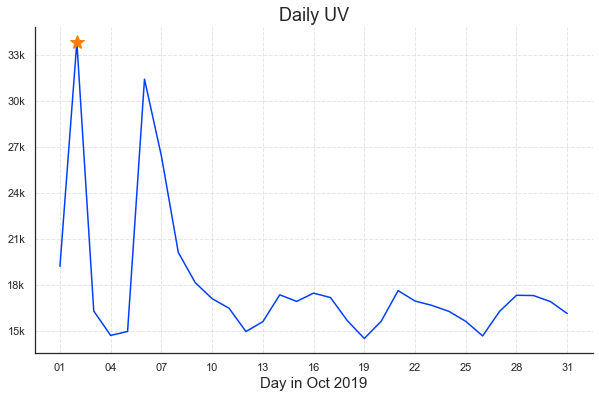

In [19]:
xlabel = range(1,32,2)

fig = plt.figure(figsize = (10,6))
sns.set(style = 'white', palette = 'bright')
ax = fig.add_subplot()
plt.plot(uv_d.day, uv_d.uv)
plt.plot(uv_d_max.day, uv_d_max.uv, marker = '*', markersize = 15)

plt.title('Daily UV', fontsize = 18)
plt.grid(linestyle = "--", alpha = 0.5)
plt.xlabel('Day in Oct 2019',fontsize = 15)
ax.set_yticks(range(15000,34000,3000))
ax.set_yticklabels(['15k','18k','21k','24k','27k','30k','33k'])
ax.set_xticks(['01','04','07','10','13','16','19','22','25','28','31'])
plt.grid(linestyle = "--", alpha = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig('2.11 daily UV.png')

### hourly
Use groupby to extract PV and UV data in different hours.  
For the hour is set from 0 to 23, add one row for 24 and set the data in this row the same as the data from 0.

In [20]:
pv_hour = df.groupby('hour').user_id.count().reset_index().rename(columns = {'user_id':'pv'})
#add 24 value equal to 0
pv_hour.loc['24'] = [24,43015]

In [21]:
uv_hour = df.groupby('hour').user_id.nunique().reset_index().rename(columns = {'user_id':'uv'})
uv_hour
uv_hour.loc['24'] = [24,6860]

In [22]:
pv_h_max = pv_hour[pv_hour.pv == pv_hour.pv.max()]
pv_h_max

,hour,pv
19,19,264289


In [23]:
uv_h_max = uv_hour[uv_hour.uv == uv_hour.uv.max()]
uv_h_max

,hour,uv
12,12,39572


Draw the line plot for PV and UV in different hours:  
Use plt.plot to add marker for the highest data

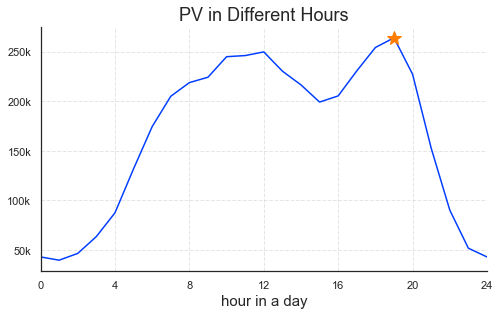

In [24]:
fig = plt.figure(figsize = (8,4.5))
sns.set(style = 'white', palette = 'bright')
ax = fig.add_subplot()
ax.plot(pv_hour.hour, pv_hour.pv)
plt.title('PV in Different Hours', fontsize = 18)
plt.plot(pv_h_max.hour,pv_h_max.pv, marker = '*', markersize = 15)
ax.set_xticks(range(0,25,4))
plt.xlim(0,24)
ax.set_yticks(range(50000,250001, 50000))
ax.set_yticklabels(['50k','100k','150k','200k','250k'])
plt.xlabel('hour in a day', fontsize = 15)
plt.grid(linestyle = '--', alpha = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig('2.11 hourly pv.png')

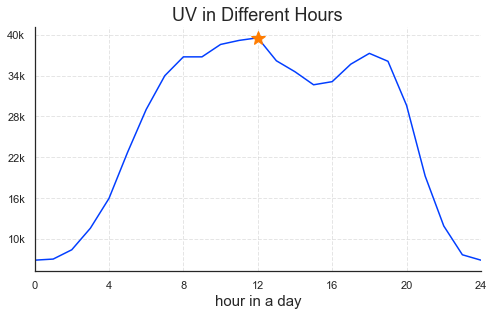

In [25]:
fig = plt.figure(figsize = (8,4.5))
sns.set(style = 'white', palette = 'bright')
ax = fig.add_subplot()
ax.plot(uv_hour.hour, uv_hour.uv)
plt.title('UV in Different Hours', fontsize = 18)
plt.plot(uv_h_max.hour,uv_h_max.uv, marker = '*', markersize = 15)
ax.set_xticks(range(0,25,4))
plt.xlim(0,24)
ax.set_yticks(range(10000,40001,6000))
ax.set_yticklabels(['10k','16k','22k','28k','34k','40k'])
plt.xlabel('hour in a day', fontsize = 15)
plt.grid(linestyle = '--', alpha = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

#plt.savefig('2.11 hourly uv.png')

### pv based on event type
Extract PV data for four different event types in every day:  
Using the groupby method or pivor table method:

In [26]:
#daily
pv_event = df.groupby(['event_type','date']).user_id.count().reset_index().rename(columns = {'user_id':"pv"})
pv_event.head()

,event_type,date,pv
0,cart,2019-10-01,46916
1,cart,2019-10-02,89124
2,cart,2019-10-03,35745
3,cart,2019-10-04,31347
4,cart,2019-10-05,31201


In [27]:
#use pivot table
pd.pivot_table(pv_event, values = 'pv', index = 'date', 
               columns = 'event_type')

event_type,cart,purchase,remove_from_cart,view
date,,,,
2019-10-01,46916,8476,25813,61209
2019-10-02,89124,9100,26347,76497
2019-10-03,35745,8865,23303,56934
2019-10-04,31347,7562,23029,53672
2019-10-05,31201,5940,19791,49410
2019-10-06,81376,7265,25826,72911
2019-10-07,66954,9376,29222,75897
2019-10-08,47364,8604,28028,64944
2019-10-09,37991,8464,28013,65432


Using sns.pointplot to draw the line plot with markers for each day data:

Text(0, 0.5, 'PV')

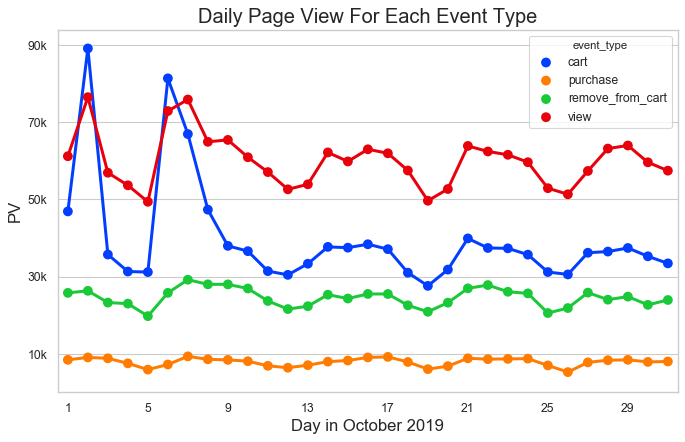

In [28]:
fig = plt.figure(figsize = (10, 6), dpi = 80)
sns.set(style = 'whitegrid', palette = 'bright')
ax = fig.add_subplot()
sns.pointplot(data = pv_event, x = 'date', y = 'pv', hue = 'event_type')
ax.set_xticks(range(0,pv_event.date.nunique()+1,4))
ax.set_xticklabels(range(1,pv_event.date.nunique()+1,4))
ax.set_yticks(range(10000,90001,20000))
ax.set_yticklabels(['10k','30k','50k','70k','90k'])
plt.title('daily page view for each event type'.title(), fontsize = 18)
plt.xlabel('Day in October 2019', fontsize = 15)
plt.ylabel('PV', fontsize = 15)
#plt.savefig('2.12 daily page view for each event type.png')

Extract hourly PV data for different event types  
add four rows for 24th hour in each event type, which equals to the data in at 0 a.m.

In [29]:
#hourly
pv_event_h = df.groupby(['event_type','hour']).user_id.count().reset_index().rename(columns = {'user_id':'pv'})
pv_event_h.iloc[72,:]

event_type     view
hour              0
pv            16743
Name: 72, dtype: object

In [30]:
#set 24 = 0
pv_event_h.loc['96'] = ['cart',24,pv_event_h.iloc[0,2]]
pv_event_h.loc['97'] = ['purchase',24,pv_event_h.iloc[24,2]]
pv_event_h.loc['98'] = ['remove_from_cart',24,pv_event_h.iloc[48,2]]
pv_event_h.loc['99'] = ['view',24,pv_event_h.iloc[72,2]]
pv_event_h.tail()

,event_type,hour,pv
95,view,23,21924
96,cart,24,17080
97,purchase,24,2082
98,remove_from_cart,24,7110
99,view,24,16743


Use sns.pointplot draw the line plot with markers:

Text(0, 0.5, 'PV')

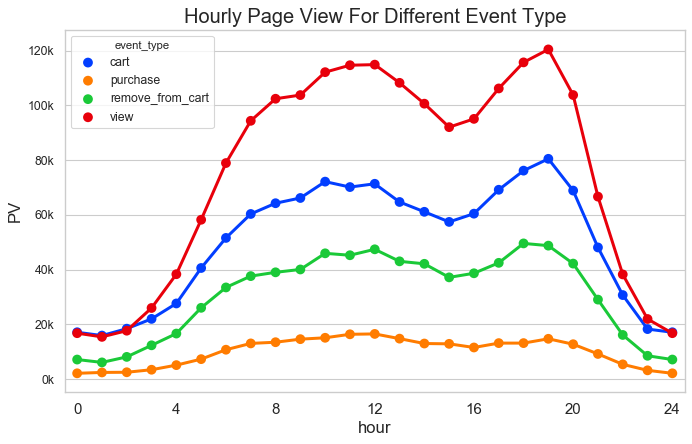

In [31]:
fig = plt.figure(figsize = (10,6), dpi = 80)
sns.set(style = 'whitegrid', palette = 'bright')
ax = fig.add_subplot()
sns.pointplot(data = pv_event_h,
             x = 'hour',
             y = 'pv',
             hue = 'event_type')
ax.set_xticks(range(0,25,4))
ax.set_xticklabels(range(0,25,4),fontsize = 13.5)
ax.set_yticks(range(0,120001, 20000))
ax.set_yticklabels(["0k","20k","40k","60k",'80k','100k','120k'])
plt.title('hourly page view for different event type'.title(), fontsize = 18)
plt.xlabel('hour',fontsize = 15)
plt.ylabel('PV', fontsize = 15)
#plt.savefig('2.13 hourly page view for different event type.png')

## customer purchase behavior analysis
### customer buying frequency analysis
Calculate that how many times totally one user has purchased in this month.

In [32]:
daily_purchase_user = df[df.event_type == 'purchase'].groupby('user_id').event_type.count()
daily_purchase_user.describe()

count    25762.000000
mean         9.534353
std         11.341405
min          1.000000
25%          3.000000
50%          6.000000
75%         12.000000
max        329.000000
Name: event_type, dtype: float64

In total, 25,762 users has purchase event in October. The average purchase times is 9.5 and the median of purchase times is 6. 75% of purchased users purchase less than 12 times in October.   
Draw the histgram for total purchase time:

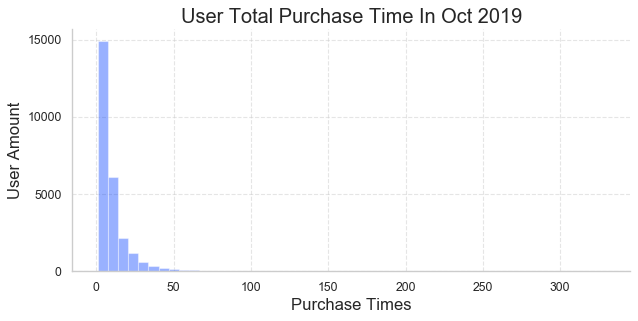

In [33]:
fig = plt.figure(figsize = (9,4), dpi = 80)
ax = fig.add_subplot()
sns.set(style = 'white', palette = 'bright')
sns.distplot(daily_purchase_user, kde = False)
plt.grid(linestyle = '--', alpha = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.title('user total purchase time in Oct 2019'.title(), fontsize = 18)
plt.xlabel('Purchase Times',fontsize = 15)
plt.ylabel('User Amount', fontsize = 15)
ax.set_yticks(range(0,15001,5000))
#plt.savefig('2.21 user total purchase time in oct.png')

### daily ARPPU(average revenue per paying user)
Extract the total revenue for each day and the number of unique purchased users.  
Calculate the ARPPU = daily total revenue / daily total unique purchaser:

In [34]:
daily_revenue = df[df.event_type == 'purchase'].groupby('date').price.sum().reset_index()
daily_pay_user = df[df.event_type == 'purchase'].groupby('date').user_id.nunique().reset_index()

In [35]:
daily_arppu = pd.merge(daily_revenue,daily_pay_user, on = 'date')
daily_arppu.head()

,date,price,user_id
0,2019-10-01,7049.08,1001
1,2019-10-02,7414.33,1045
2,2019-10-03,7031.45,1048
3,2019-10-04,5816.20,892
4,2019-10-05,4737.14,708


In [36]:
daily_arppu['arppu'] = daily_arppu.price/daily_arppu.user_id
daily_arppu['day'] = daily_arppu.date.dt.strftime('%d')
daily_arppu.head()

,date,price,user_id,arppu,day
0,2019-10-01,7049.08,1001,7.042038,01
1,2019-10-02,7414.33,1045,7.095053,02
2,2019-10-03,7031.45,1048,6.709399,03
3,2019-10-04,5816.20,892,6.520404,04
4,2019-10-05,4737.14,708,6.690876,05


In [37]:
daily_arppu.arppu.describe()

count    31.000000
mean      6.775778
std       0.249620
min       6.162714
25%       6.651915
50%       6.757758
75%       6.969013
max       7.194442
Name: arppu, dtype: float64

Text(0, 0.5, 'ARPPU')

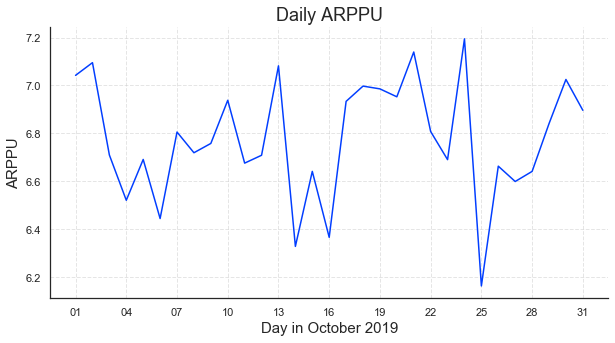

In [38]:
fig = plt.figure(figsize = (10, 5))
ax = fig.add_subplot()
plt.plot(daily_arppu.day, daily_arppu.arppu)
plt.title('Daily ARPPU', fontsize = 18)
plt.grid(linestyle = '--', alpha =0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(range(0,33,3))
plt.xlabel('Day in October 2019',fontsize = 15)
plt.ylabel('ARPPU',fontsize = 15)
#plt.savefig('2.23 Daily ARPPU.png')

### daily ARPU(Average Revenue per user)
extract amount of daily actived users  
calculate ARPU = daily total revenue/daily actived users

In [39]:
daily_user = df.groupby('date').user_id.nunique().reset_index().rename(columns = {"user_id":"daily_active"})
daily_user.head()

,date,daily_active
0,2019-10-01,19230
1,2019-10-02,33859
2,2019-10-03,16323
3,2019-10-04,14731
4,2019-10-05,14989


In [40]:
daily_arpu = pd.merge(daily_revenue, daily_user, on = 'date')
daily_arpu['arpu'] = daily_arpu.price/daily_arpu.daily_active
daily_arpu['day'] = daily_arpu.date.dt.strftime('%d')
daily_arpu.arpu.describe()

count    31.000000
mean      0.363168
std       0.059283
min       0.170975
25%       0.347734
50%       0.371519
75%       0.398188
max       0.431199
Name: arpu, dtype: float64

Text(0, 0.5, 'ARPU')

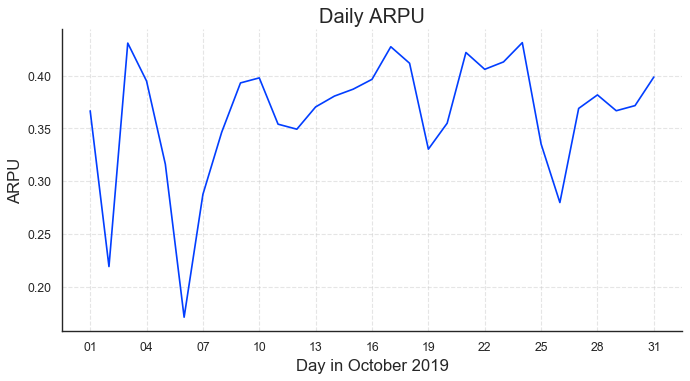

In [41]:
fig = plt.figure(figsize = (10,5), dpi = 80)
ax = fig.add_subplot()
plt.plot(daily_arpu.day, daily_arpu.arpu)
plt.title('Daily ARPU', fontsize = 18)
plt.grid(linestyle = '--', alpha = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(range(0,33,3))
plt.xlabel('Day in October 2019',fontsize = 15)
plt.ylabel('ARPU',fontsize = 15)
#plt.savefig('2.23 Daily ARPU.png')

### pay user rate
pay user rate = total paied user/total active user

In [42]:
daily_pay_user = df[df.event_type == 'purchase'].groupby('date').user_id.nunique().reset_index().rename(columns = {'user_id':'daily_pay_user'})

In [100]:
daily_pay_rate = daily_pay_user.daily_pay_user/daily_user.daily_active
mean = daily_pay_rate.mean()
daily_pay_rate.describe()

count    31.000000
mean      0.053611
std       0.008663
min       0.026532
25%       0.051795
50%       0.055896
75%       0.059359
max       0.064204
dtype: float64

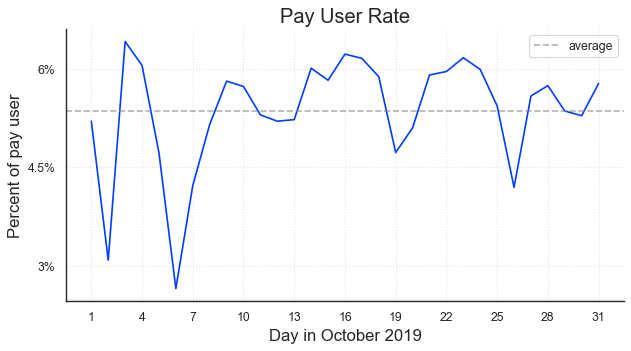

In [44]:
fig = plt.figure(figsize = (9, 4.5), dpi = 80)
ax = fig.add_subplot()
day = daily_pay_user.date.dt.day
plt.plot(day, daily_pay_rate)
plt.title('Pay User Rate', fontsize = 18)
plt.xlabel('Day in October 2019', fontsize = 15)
plt.ylabel('Percent of pay user', fontsize = 15)
ax.set_yticks([0.025,0.03, 0.045, 0.06])
ax.set_yticklabels(["",'3%','4.5%','6%'])
ax.set_xticks(range(1,32,3))
plt.grid(linestyle = ':', alpha = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.axhline(mean, linestyle = "--", color = 'grey', alpha = 0.6, label = 'average')
plt.legend()
#plt.savefig('2.24 Pay User Rage.png')

## repurchase rate
### repurchase times
Extract purchase times for all purcased users:  

In [45]:
buy = df[df.event_type == 'purchase'].groupby(['user_id']).date.nunique().reset_index().rename(columns = {'date':'times'})
buy.head()

,user_id,times
0,29025780,2
1,31229488,1
2,33535391,1
3,33609704,1
4,34080306,1


Seperate the users who purchase more than once.  
calculate repurchase rate and draw histgram for repurchase times.

In [46]:
rebuy_amount = buy[buy.times >= 2]
rebuy_amount['re_times'] = rebuy_amount.times-1
rebuy_amount.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,user_id,times,re_times
0,29025780,2,1
25,69749548,2,1
45,92366748,2,1
47,95758554,3,2
83,141894282,2,1


In [47]:
rebuy_amount.re_times.describe()

count    2492.000000
mean        1.291734
std         0.865715
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        20.000000
Name: re_times, dtype: float64

Repurchase rate is 0.0967


(array([2.359e+03, 7.700e+01, 3.000e+01, 1.400e+01, 5.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.        ,  2.26666667,  3.53333333,  4.8       ,  6.06666667,
         7.33333333,  8.6       ,  9.86666667, 11.13333333, 12.4       ,
        13.66666667, 14.93333333, 16.2       , 17.46666667, 18.73333333,
        20.        ]),
 <a list of 15 Patch objects>)

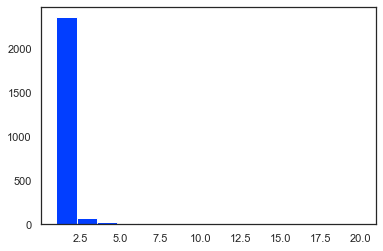

In [48]:
repurchase_rate = round(len(rebuy_amount)/len(buy),4)
print('Repurchase rate is {}'.format(repurchase_rate))
sns.set(style = 'white', palette = 'bright')
plt.hist(rebuy_amount.re_times, bins = 15)

For more than 75% of users only repurchase once, use pd.cut to seperate the repurchase time to 1, 2, 3 and more than 3 in order to draw pie chart.

In [49]:
bins_rebuy = [0,1,2,100]
labels_rebuy = ['once','twice',"more than twice"]
rebuy_amount['bins'] = pd.cut(rebuy_amount.re_times,bins = bins_rebuy, labels = labels_rebuy)
rebuy_amount.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,user_id,times,re_times,bins
0,29025780,2,1,once
25,69749548,2,1,once
45,92366748,2,1,once
47,95758554,3,2,twice
83,141894282,2,1,once


In [50]:
rebuy_bins_per = rebuy_amount.groupby('bins').user_id.count().reset_index()
rebuy_bins_per['per'] = rebuy_bins_per.user_id/rebuy_bins_per.user_id.sum()
rebuy_bins_per

,bins,user_id,per
0,once,2033,0.815811
1,twice,326,0.130819
2,more than twice,133,0.053371


Text(0.5, 1.0, 'Total Repurchase Times')

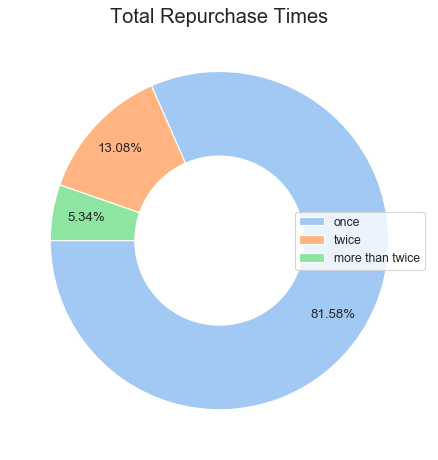

In [51]:
fig = plt.figure(figsize = (9,7), dpi = 80)
sns.set(style = 'white', palette = 'pastel')
plt.pie(rebuy_bins_per.user_id, autopct = "%.2f%%",
       pctdistance = 0.8,
       startangle = 180)
plt.pie([1,0], radius = 0.5, colors = 'w')
plt.legend(labels = labels_rebuy, loc = 5)
plt.title('Total Repurchase Times', fontsize = 18)
#plt.savefig('2.31 total repurchase times.png')

### repurchase time gap
Calculate the repurchase time gap between a user first purchase and the last purchse in this month.  
Extract the min and max purchase time from repurchase users.

In [52]:
purchase = df[df.event_type == 'purchase']
repur = purchase.groupby(['user_id']).date.count().reset_index()
repur_data = purchase[purchase.user_id.isin(repur[repur.date>=2].user_id)]
repur_time_gap = repur_data.groupby(['user_id']).date.apply(lambda x: x.max()-x.min())
repur_time_gap.head()

user_id
29025780   5 days
31229488   0 days
33535391   0 days
33609704   0 days
34080306   0 days
Name: date, dtype: timedelta64[ns]

In [53]:
repur_time_gap = repur_time_gap.reset_index()
repur_time_gap.head()

,user_id,date
0,29025780,5 days
1,31229488,0 days
2,33535391,0 days
3,33609704,0 days
4,34080306,0 days


In [54]:
repur_time_gap.date = repur_time_gap.date.dt.days

In [55]:
repur_time_gap.date.describe()

count    23324.000000
mean         1.246441
std          4.405746
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         30.000000
Name: date, dtype: float64

Repurchase is defined as user who purchase on different days, so the time gap zero day is removed.

In [56]:
timegap_nosameday = repur_time_gap.date[repur_time_gap.date > 0]
timegap_nosameday.describe()

count    2492.000000
mean       11.666132
std         7.754571
min         1.000000
25%         5.000000
50%        11.000000
75%        18.000000
max        30.000000
Name: date, dtype: float64

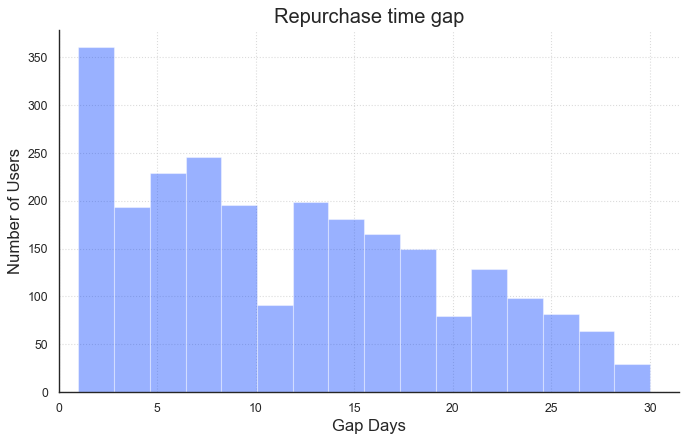

In [57]:
fig = plt.figure(figsize = (10,6), dpi = 80)
ax = fig.add_subplot()
sns.set(style = 'white', palette = 'bright')
sns.distplot(timegap_nosameday, bins = 16,kde = False, color = 'b')
plt.xlim(xmin = 0)
plt.title('Repurchase time gap',fontsize = 18)
plt.xlabel('Gap Days', fontsize = 15)
plt.grid(linestyle = ':', alpha = 0.7)
plt.ylabel('Number of Users', size = 15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.set_xticks(range(1,31,2))
#plt.savefig('2.32 Repurchase time gap.png')

# 制作漏斗图 calculate funnel

## split and merge four phases data
The data is splited based on four event types. Then, the data from four phases is merged on the same user id and the same product id, which can be used to understand whether the same user do the next phase event for the same product.  
Also, for the data only includes the event history in October, some events may links to the previous history. For instance, a product may be added to cart in September and remove from cart in October. This type of data is excluded in the conversion rate analysis. 

In [58]:
df_view = df[df.event_type == 'view']
df_cart = df[df.event_type == 'cart']
df_rf_cart = df[df.event_type == 'remove_from_cart']
df_purchase = df[df.event_type == 'purchase']

### view to cart

In [59]:
df_v_to_c = pd.merge(left = df_view[['time',
                              'product_id','user_id',
                              'brand','price','category_id','category_code']], 
                     right = df_cart[['time','user_id','product_id']],
                     on = ['user_id','product_id'], how = 'left',
                     suffixes = ['_view','_cart'])

In [60]:
df_v_to_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2166756 entries, 0 to 2166755
Data columns (total 8 columns):
time_view        object
product_id       int64
user_id          int64
brand            object
price            float64
category_id      int64
category_code    object
time_cart        object
dtypes: float64(1), int64(3), object(4)
memory usage: 148.8+ MB


In [61]:
df_v_to_c.head()

,time_view,product_id,user_id,brand,price,category_id,category_code,time_cart
0,00:00:26,5875317,474232307,NaN,0.26,2029082628195353599,NaN,00:01:13
1,00:00:28,5692917,555446068,lianail,0.90,1487580004857414477,NaN,NaN
2,00:00:48,5819638,546705258,NaN,3.53,1487580008162526182,NaN,NaN
3,00:00:53,5856191,507355498,runail,3.96,1487580006350586771,appliances.environment.vacuum,NaN
4,00:01:11,5733176,543446752,NaN,0.10,1487580009362096156,NaN,NaN


### cart to remove from cart

In [62]:
df_v_c_r = pd.merge(left = df_v_to_c[['time_view','time_cart',
                              'product_id','user_id',
                              'brand','price','category_id','category_code']], 
                     right = df_rf_cart[['time','user_id','product_id']],
                     on = ['user_id','product_id'], how = 'left',
                     suffixes = ['_cart','_rf_cart'])
df_v_c_r.rename(columns = {'time':'time_rf_cart'},inplace = True)
df_v_c_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2811347 entries, 0 to 2811346
Data columns (total 9 columns):
time_view        object
time_cart        object
product_id       int64
user_id          int64
brand            object
price            float64
category_id      int64
category_code    object
time_rf_cart     object
dtypes: float64(1), int64(3), object(5)
memory usage: 214.5+ MB


### cart to buy

In [63]:
df_v_c_b = pd.merge(left = df_v_to_c[['time_view','time_cart',
                              'product_id','user_id',
                              'brand','price','category_id','category_code']], 
                     right = df_purchase[['time','user_id','product_id']],
                     on = ['user_id','product_id'], how = 'left',
                     suffixes = ['_cart','_rf_cart'])
df_v_c_b.rename(columns = {'time':'time_purchase'},inplace = True)
df_v_c_b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2188305 entries, 0 to 2188304
Data columns (total 9 columns):
time_view        object
time_cart        object
product_id       int64
user_id          int64
brand            object
price            float64
category_id      int64
category_code    object
time_purchase    object
dtypes: float64(1), int64(3), object(5)
memory usage: 167.0+ MB


## funnel data calculate

In [64]:
df_v_to_c1 = df_v_to_c.groupby(['user_id','product_id']).time_cart.nunique().reset_index()
df_v_to_c1.head()

,user_id,product_id,time_cart
0,4103071,5563536,0
1,4103071,5670334,0
2,4103071,5735272,0
3,4103071,5784982,0
4,4103071,5795273,0


In [65]:
view_num = len(df_v_to_c1)
cart_num = view_num - len(df_v_to_c1[df_v_to_c1.time_cart == 0])
v_to_c_rate = round(cart_num/view_num,4)
print("number of view users: {}, number of add cart users:{},v_to_c rate is {}".format(view_num, cart_num, v_to_c_rate))

number of view users: 1402738, number of add cart users:326246,v_to_c rate is 0.2326


In [66]:
df_c_to_r1 = df_v_c_r.groupby(['user_id','product_id']).time_rf_cart.nunique().reset_index()
df_c_to_r1.head()

,user_id,product_id,time_rf_cart
0,4103071,5563536,0
1,4103071,5670334,0
2,4103071,5735272,0
3,4103071,5784982,0
4,4103071,5795273,0


In [67]:
rf_num = len(df_c_to_r1[df_c_to_r1.time_rf_cart != 0])
rf_num
c_to_rf_rate = round(rf_num/cart_num,4)

In [68]:
df_v_c_b1 = df_v_c_b.groupby(['product_id','user_id']).time_purchase.nunique().reset_index()
df_v_c_b1.head()

,product_id,user_id,time_purchase
0,3752,306131139,0
1,3752,525448973,0
2,3752,543825317,0
3,3752,552966434,0
4,3752,558771491,0


In [69]:
b_num = len(df_v_c_b1[df_v_c_b1.time_purchase != 0])
b_num
c_to_b_rate = round(b_num/cart_num,4)

In [70]:

print("""
number of view is:{}
number of add to cart is :{}
number of remove from cart is:{}
number of purchase is :{}
rate from view to add to cart is:{}
rate from add to cart to remove is:{}
rate from add to cart to purchase is: {}
""".format(view_num, cart_num, rf_num, b_num,v_to_c_rate,c_to_rf_rate, c_to_b_rate))


number of view is:1402738
number of add to cart is :326246
number of remove from cart is:151954
number of purchase is :86771
rate from view to add to cart is:0.2326
rate from add to cart to remove is:0.4658
rate from add to cart to purchase is: 0.266



## plot the funnel

In [71]:
"""
from pyecharts import Funnel
funnel = Funnel('funnel',width = 800, height = 600, title_pos = 'center')
event = ['view','add to chart','purchase']
event_num = [view_num, chart_num, b_num]
funnel.add('cosmetic ecommerce',event, event_num,
           label_pos = 'inside', 
          label_formatter = '{b},{d}')
funnel.render()
"""

"\nfrom pyecharts import Funnel\nfunnel = Funnel('funnel',width = 800, height = 600, title_pos = 'center')\nevent = ['view','add to chart','purchase']\nevent_num = [view_num, chart_num, b_num]\nfunnel.add('cosmetic ecommerce',event, event_num,\n           label_pos = 'inside', \n          label_formatter = '{b},{d}')\nfunnel.render()\n"

# product category analysis

In [72]:
brandtop10 = df.brand.value_counts()[:10]
brandtop10 = brandtop10.reset_index().rename(columns = {"index":"top_brand","brand":"count"})
brandtop10.head()

,top_brand,count
0,runail,306239
1,irisk,226589
2,masura,195170
3,grattol,132130
4,bpw.style,114192


In [73]:
brand_event = df[df.brand.isin(brandtop10.top_brand)].groupby(['brand','event_type']).user_id.count().unstack().reset_index()

In [74]:
brand_event.head()

event_type,brand,cart,purchase,remove_from_cart,view
0,bpw.style,37785,9506,23576,43325
1,estel,16207,3211,8035,36989
2,grattol,33494,6438,24327,67871
3,ingarden,27948,5181,22060,35091
4,irisk,78293,15645,47330,85321


In [75]:
brand_event['v_to_c'] = brand_event.cart/brand_event.view
brand_event['c_to_b'] = brand_event.purchase/brand_event.cart
brand_event

event_type,brand,cart,purchase,remove_from_cart,view,v_to_c,c_to_b
0,bpw.style,37785,9506,23576,43325,0.872129,0.251581
1,estel,16207,3211,8035,36989,0.438157,0.198124
2,grattol,33494,6438,24327,67871,0.493495,0.192214
3,ingarden,27948,5181,22060,35091,0.796444,0.185380
4,irisk,78293,15645,47330,85321,0.917629,0.199826
5,kapous,14576,3117,7306,32916,0.442824,0.213845
6,masura,58657,11356,45649,79508,0.737750,0.193600
7,pole,19789,3360,15048,23408,0.845395,0.169791
8,runail,98737,21936,65957,119609,0.825498,0.222166
9,uno,13307,3218,8169,23334,0.570284,0.241828


In [76]:
brand_event_vb = brand_event.sort_values(by = 'v_to_c', ascending = False)

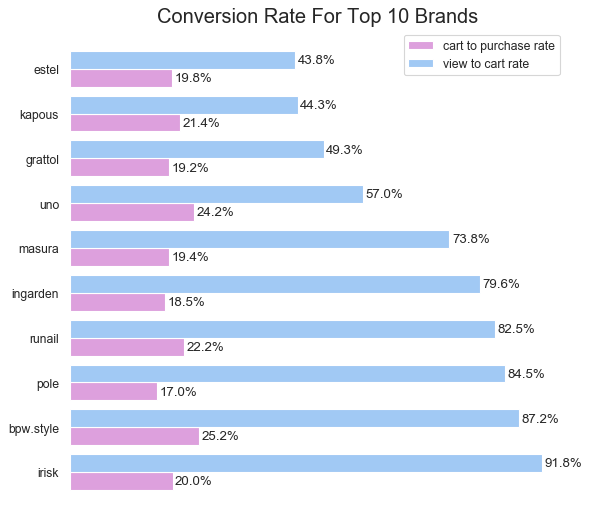

In [105]:
fig = plt.figure(figsize = (8,8), dpi = 80)
ax = fig.add_subplot()
sns.set(style = 'white', palette = 'pastel')
bar1y = [(2*i + 0.8*1) for i in range(len(brand_event_vb.c_to_b))]
bar2y = [(2*i + 0.8*2) for i in range(len(brand_event_vb.v_to_c))]
plt.barh(bar1y, brand_event_vb.c_to_b, color = 'plum', label = 'cart to purchase rate')
plt.barh(bar2y, brand_event_vb.v_to_c, label = 'view to cart rate')
#plt.vlines(brand_event_vb.v_to_c.mean(),ymin = -1, ymax = len(brand_event_vb),
#          linestyle = '--',color = 'grey', alpha = 0.8,
 #         label = 'mean: {}'.format(round(brand_event_vb.v_to_c.mean(),4)))
#ax.set_xticks([0,0.2,0.4,0.6,0.8,1.0])
#ax.set_xticklabels(["0%","20%","40%","60%","80%","100%"])
ax.set_xticks([])
y =[]
for y1, y2 in zip(bar1y, bar2y):
    a = (y1+y2)/2
    y.append(a)
ax.set_yticks(y)
ax.set_yticklabels(brand_event_vb.brand)
plt.title('conversion rate for top 10 brands'.title(), fontsize = 18)

for x,y in zip(brand_event_vb.c_to_b, bar1y):
    plt.text(x+0.005, y-0.15, ("%.1f%%")%(x*100))
for x,y in zip(brand_event_vb.v_to_c, bar2y):
    plt.text(x+0.005, y-0.15, ("%.1f%%")%(x*100))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.legend()
#plt.savefig('4.1 Conversion Rate for top10 brands.png')

# 20:80
## top 20 user

In [78]:
total_revenue = purchase.price.sum()
total_revenue

196408.74

In [79]:
top_user = purchase.groupby('user_id').price.sum().reset_index().sort_values(by = 'price', ascending = False)
per20 = int(len(top_user)*0.2)
top_20user_revenue = top_user.price[:per20].sum()
print('Revenue from top 20 users is {} percent'.format(round(top_20user_revenue/total_revenue, 2)))

Revenue from top 20 users is 0.52 percent


## top20 product

In [80]:
top_product = purchase.groupby('category_id').price.sum().reset_index().sort_values(by = 'price',ascending = False)
per20_category = int(len(top_product)*0.2)
top_20product_revenue = top_product.price[:per20_category].sum()
print('Revenue from top 20 categories is {} percent'.format(round(top_20product_revenue/total_revenue, 2)))

Revenue from top 20 categories is 0.81 percent


# RFM(recency, frequency, monetary)
## extract RFM data
calculate the purchased users' recent purchase time, purchase frequency in this month and the total payment they made.

In [81]:
recent_buy_time = purchase.groupby('user_id').time_zoneless.min().reset_index().rename(columns = {'time_zoneless':'recent_pur_time'})

In [82]:
from datetime import datetime, timedelta
end_oct = datetime(2019,10,31,23,59,59)
recent_buy_time['gap'] = end_oct - recent_buy_time.recent_pur_time
recent_buy_time.gap = recent_buy_time.gap.map(lambda x:x.days)
recent_buy_time.head()

,user_id,recent_pur_time,gap
0,29025780,2019-10-02 19:56:18,29
1,31229488,2019-10-03 12:24:58,28
2,33535391,2019-10-13 19:07:28,18
3,33609704,2019-10-15 07:55:05,16
4,34080306,2019-10-30 18:30:12,1


In [83]:
buy_freq = purchase.groupby('user_id').time_zoneless.count().reset_index().rename(columns = {'time_zoneless':'pur_freq'})
buy_freq.head()

,user_id,pur_freq
0,29025780,18
1,31229488,4
2,33535391,11
3,33609704,9
4,34080306,3


In [84]:
monetary = purchase.groupby('user_id').price.sum().reset_index().rename(columns = {'price':'total_momentary'})
monetary.head()

,user_id,total_momentary
0,29025780,6.77
1,31229488,2.34
2,33535391,22.53
3,33609704,5.08
4,34080306,2.72


In [85]:
rfm_data = pd.merge(recent_buy_time, buy_freq, on = 'user_id')

In [86]:
rfm_data = pd.merge(rfm_data, monetary, on = 'user_id')

In [87]:
rfm_data.head()

,user_id,recent_pur_time,gap,pur_freq,total_momentary
0,29025780,2019-10-02 19:56:18,29,18,6.77
1,31229488,2019-10-03 12:24:58,28,4,2.34
2,33535391,2019-10-13 19:07:28,18,11,22.53
3,33609704,2019-10-15 07:55:05,16,9,5.08
4,34080306,2019-10-30 18:30:12,1,3,2.72


## give score to each users in RFM
cut each data into to groups, better one is labeled 2. 

In [88]:
rfm_data['recent_value'] = pd.qcut(rfm_data.recent_pur_time, 2, labels = ['1','2'])
rfm_data['freq_value'] = pd.qcut(rfm_data.pur_freq,2,labels = ['1','2'])
rfm_data['mon_value'] = pd.qcut(rfm_data.total_momentary, 2, labels = ['1','2'])
rfm_data['rfm'] = rfm_data['recent_value'].str.cat([rfm_data.freq_value,rfm_data.mon_value])

In [89]:
rfm_data.head()

,user_id,recent_pur_time,gap,pur_freq,total_momentary,recent_value,freq_value,mon_value,rfm
0,29025780,2019-10-02 19:56:18,29,18,6.77,1,2,2,122
1,31229488,2019-10-03 12:24:58,28,4,2.34,1,1,1,111
2,33535391,2019-10-13 19:07:28,18,11,22.53,1,2,2,122
3,33609704,2019-10-15 07:55:05,16,9,5.08,1,2,1,121
4,34080306,2019-10-30 18:30:12,1,3,2.72,2,1,1,211


In [90]:
rfm_summary = rfm_data.groupby('rfm').user_id.count().reset_index().rename(columns = {'user_id':'count'})

In [91]:
rfm_label = {'111':"Small rare purchase",
            "112":"High spend rare purchase",
            "121":"Low occasion spending",
            "122":"High occasion spending",
            "211":"Low spend new customers",
            "212":"High spend new customers",
            "221":"Low spend active loyal customers",
            "222":"Best customers"}
rfm_summary.replace(rfm_label, inplace = True)
rfm_summary

,rfm,count
0,Small rare purchase,4931
1,High spend rare purchase,1667
2,Low occasion spending,1284
3,High occasion spending,4999
4,Low spend new customers,5270
5,High spend new customers,1697
6,Low spend active loyal customers,1409
7,Best customers,4505


In [92]:
rfm_data.rfm.replace(rfm_label, inplace = True)
rfm_summary = rfm_data.groupby('rfm').agg({"user_id":"count",
                                           "gap":"mean",
                             "pur_freq":"mean",
                             "total_momentary":"mean"}).rename(columns = {"user_id":"amount",
                                                                         "pur_freq":"average_pur_freq",
                                                                         "total_momentary":"average_momentary",
                                                                         "gap":"average_gap"})
rfm_summary

,amount,average_gap,average_pur_freq,average_momentary
rfm,,,,
Best customers,4505,8.317203,17.592897,12.763614
High occasion spending,4999,23.631726,19.153631,14.244807
High spend new customers,1697,7.945787,3.705952,9.303359
High spend rare purchase,1667,23.388122,3.760048,9.241218
Low occasion spending,1284,23.616044,9.741433,3.654595
Low spend active loyal customers,1409,7.796309,9.695529,3.561214
Low spend new customers,5270,7.964516,3.105882,2.590281
Small rare purchase,4931,23.398499,3.148449,2.665774


## RFM - score scale 1-5 version

In [93]:
rfm_data5 = pd.merge(recent_buy_time, buy_freq, on = 'user_id')
rfm_data5 = pd.merge(rfm_data5, monetary, on = 'user_id')

In [94]:
rfm_data5['recent_value'] = pd.qcut(rfm_data5.recent_pur_time, 5, 
                                    labels = ['1',"2","3","4","5"])
rfm_data5['freq_value'] = pd.qcut(rfm_data5.pur_freq,5,
                                 labels = ['1',"2","3","4","5"])
rfm_data5['mon_value'] = pd.qcut(rfm_data5.total_momentary, 5, 
                                labels = ['1',"2","3","4","5"])
rfm_data5['rfm'] = rfm_data5['recent_value'].str.cat([rfm_data5.freq_value,rfm_data5.mon_value])
rfm_data5['recent_value'] = pd.to_numeric(rfm_data5['recent_value'])
rfm_data5['mon_value'] = pd.to_numeric(rfm_data5['mon_value'])
rfm_data5['freq_value'] = pd.to_numeric(rfm_data5['freq_value'])
rfm_data5['fm'] = (rfm_data5['mon_value']+rfm_data5['freq_value'] )/2
rfm_data5.head()

,user_id,recent_pur_time,gap,pur_freq,total_momentary,recent_value,freq_value,mon_value,rfm,fm
0,29025780,2019-10-02 19:56:18,29,18,6.77,1,5,4,154,4.5
1,31229488,2019-10-03 12:24:58,28,4,2.34,1,2,2,122,2.0
2,33535391,2019-10-13 19:07:28,18,11,22.53,3,4,5,345,4.5
3,33609704,2019-10-15 07:55:05,16,9,5.08,3,4,3,343,3.5
4,34080306,2019-10-30 18:30:12,1,3,2.72,5,1,2,512,1.5


Define and calculate the customer segments:

In [95]:
#use function to define the customer segment
def rfm_segment(r, fm):
    if fm <= 1:
        if r <=2:
            return "Lost"
        elif r <=3:
            return "About to Sleep"
        elif r <=4:
            return "Promising"
        else:
            return "New Customers"
    elif fm <=2:
        if r<=1:
            return "Lost"
        elif r<=2:
            return "Hibernating"
        elif r<=3:
            return "About to Sleep"
        else:
            return "Potential Loyalist"
    elif fm<=3:
        if r <= 2:
            return "At Risk"
        elif r <=3:
            return "Need Attention"
        else:
            return "Potential Loyalist"
    elif fm<=4:
        if r <=2:
            return "At Risk"
        else:
            return "Loyal Customers"
    else:
        if r <= 1:
            return "Can't Lose Them"
        elif r <= 2:
            return "At Risk"
        elif r <=4:
            return "Loyal Customers"
        else:
            return "Champions"

In [96]:
x = []
for r, fm in zip (rfm_data5.recent_value, rfm_data5.fm):
    x.append(rfm_segment(r, fm))
rfm_data5['segment'] = x
rfm_data5.head()

,user_id,recent_pur_time,gap,pur_freq,total_momentary,recent_value,freq_value,mon_value,rfm,fm,segment
0,29025780,2019-10-02 19:56:18,29,18,6.77,1,5,4,154,4.5,Can't Lose Them
1,31229488,2019-10-03 12:24:58,28,4,2.34,1,2,2,122,2.0,Lost
2,33535391,2019-10-13 19:07:28,18,11,22.53,3,4,5,345,4.5,Loyal Customers
3,33609704,2019-10-15 07:55:05,16,9,5.08,3,4,3,343,3.5,Loyal Customers
4,34080306,2019-10-30 18:30:12,1,3,2.72,5,1,2,512,1.5,Potential Loyalist


In [97]:
customer_segment = rfm_data5.groupby('segment').agg({"user_id":"count",
                                                    "total_momentary":"mean",
                                                    "pur_freq":"mean",
                                                    "gap":"mean"})
customer_segment

,user_id,total_momentary,pur_freq,gap
segment,,,,
About to Sleep,1910,2.556869,2.902094,16.098429
At Risk,5423,9.338414,11.400885,24.344274
Can't Lose Them,1290,19.832132,26.839535,27.933333
Champions,920,16.192587,23.189130,2.934783
Hibernating,1220,3.065705,3.432787,22.140164
Lost,2372,2.283141,2.646290,26.382799
Loyal Customers,5156,11.753156,15.581265,11.090186
Need Attention,1129,5.855536,5.701506,16.110717
New Customers,761,1.587792,1.963206,3.067017


In [98]:
#add segment percent:
customer_segment['percent'] = customer_segment.user_id.agg(lambda x: x/x.sum())
customer_segment

,user_id,total_momentary,pur_freq,gap,percent
segment,,,,,
About to Sleep,1910,2.556869,2.902094,16.098429,0.074140
At Risk,5423,9.338414,11.400885,24.344274,0.210504
Can't Lose Them,1290,19.832132,26.839535,27.933333,0.050074
Champions,920,16.192587,23.189130,2.934783,0.035712
Hibernating,1220,3.065705,3.432787,22.140164,0.047357
Lost,2372,2.283141,2.646290,26.382799,0.092074
Loyal Customers,5156,11.753156,15.581265,11.090186,0.200140
Need Attention,1129,5.855536,5.701506,16.110717,0.043824
New Customers,761,1.587792,1.963206,3.067017,0.029540


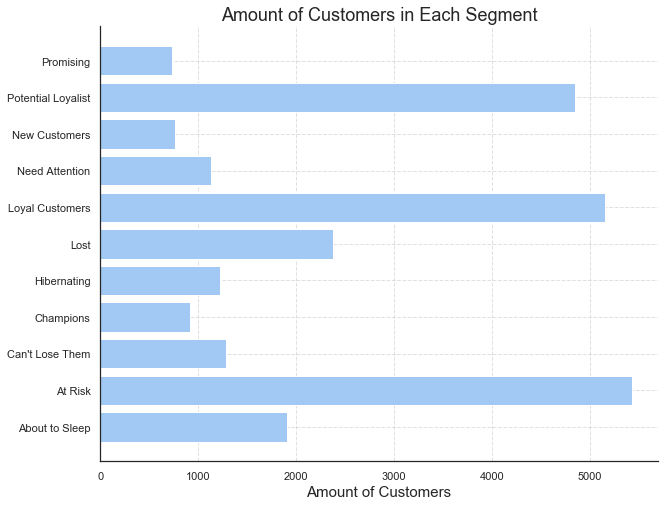

In [99]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot()
sns.set(style = "white", palette = "pastel")
plt.barh(range(len(customer_segment)),customer_segment.user_id)
plt.yticks(range(len(customer_segment)), labels = customer_segment.index)
plt.grid(linestyle = '--', alpha = 0.6)
plt.xlabel('Amount of Customers', fontsize =15)
plt.title('Amount of Customers in Each Segment', fontsize = 18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.savefig("6.3 Amount of Customer in each segment.png")